Data Shapes - X_train: (1600, 20), y_train: (1600, 5)

Starting Training...
Epoch 0, Loss: 3.4121
Epoch 200, Loss: 0.2875
Epoch 400, Loss: 0.0692
Epoch 600, Loss: 0.0277
Epoch 800, Loss: 0.0150
Epoch 1000, Loss: 0.0096
Epoch 1200, Loss: 0.0068
Epoch 1400, Loss: 0.0052
Epoch 1600, Loss: 0.0041
Epoch 1800, Loss: 0.0034

--- Evaluation Metrics ---
Accuracy:  0.7875
Precision: 0.7888
Recall:    0.7875
F1 Score:  0.7859


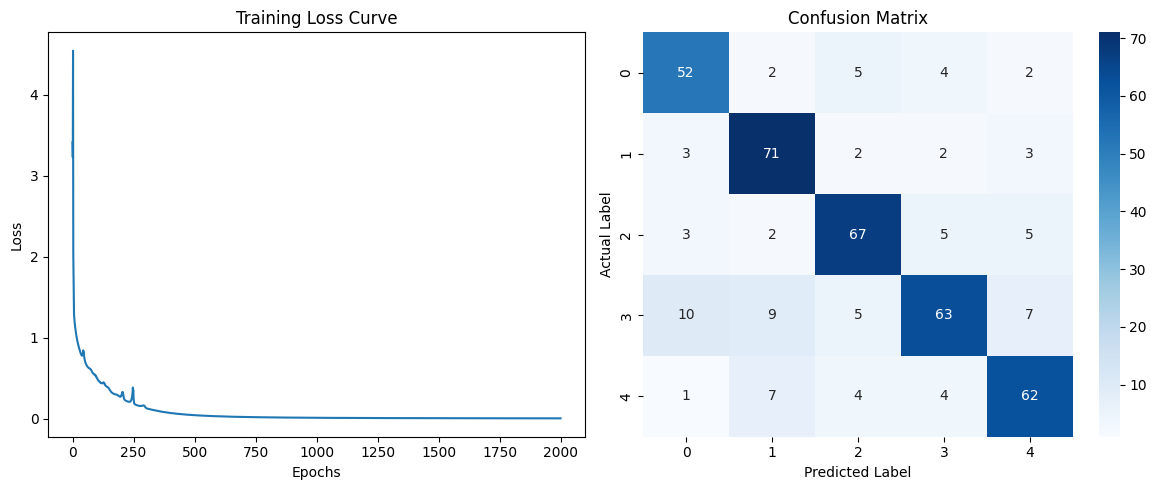

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Data Generation & Preprocessing

# Generate synthetic data with 5 classes
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_redundant=2,
    n_classes=5,
    random_state=42
)

# One-hot encoding function
def to_one_hot(y, n_classes):
    return np.eye(n_classes)[y]

y_one_hot = to_one_hot(y, 5)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

print(f"Data Shapes - X_train: {X_train.shape}, y_train: {y_train.shape}")

# 2. Neural Network Class (3 Hidden Layers)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases using He initialization (best for ReLU)
        # Layer 1
        self.W1 = np.random.randn(self.input_size, self.hidden_size) * np.sqrt(2. / self.input_size)
        self.b1 = np.zeros((1, self.hidden_size))
        # Layer 2
        self.W2 = np.random.randn(self.hidden_size, self.hidden_size) * np.sqrt(2. / self.hidden_size)
        self.b2 = np.zeros((1, self.hidden_size))
        # Layer 3
        self.W3 = np.random.randn(self.hidden_size, self.hidden_size) * np.sqrt(2. / self.hidden_size)
        self.b3 = np.zeros((1, self.hidden_size))
        # Output Layer (Layer 4)
        self.W4 = np.random.randn(self.hidden_size, self.output_size) * np.sqrt(2. / self.hidden_size)
        self.b4 = np.zeros((1, self.output_size))

    def relu(self, Z):
        return np.maximum(0, Z)

    def relu_derivative(self, Z):
        return Z > 0

    def softmax(self, Z):
        # Subtract max for numerical stability
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def forward(self, X):
        # Layer 1
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        # Layer 2
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.relu(self.Z2)
        # Layer 3
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.relu(self.Z3)
        # Layer 4 (Output)
        self.Z4 = np.dot(self.A3, self.W4) + self.b4
        self.A4 = self.softmax(self.Z4)
        return self.A4

    def backward(self, X, y, output):
        m = X.shape[0]

        # Gradients for Output Layer
        dZ4 = output - y
        dW4 = (1/m) * np.dot(self.A3.T, dZ4)
        db4 = (1/m) * np.sum(dZ4, axis=0, keepdims=True)

        # Gradients for Layer 3
        dA3 = np.dot(dZ4, self.W4.T)
        dZ3 = dA3 * self.relu_derivative(self.Z3)
        dW3 = (1/m) * np.dot(self.A2.T, dZ3)
        db3 = (1/m) * np.sum(dZ3, axis=0, keepdims=True)

        # Gradients for Layer 2
        dA2 = np.dot(dZ3, self.W3.T)
        dZ2 = dA2 * self.relu_derivative(self.Z2)
        dW2 = (1/m) * np.dot(self.A1.T, dZ2)
        db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

        # Gradients for Layer 1
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.Z1)
        dW1 = (1/m) * np.dot(X.T, dZ1)
        db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

        # Update Weights and Biases
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3
        self.W4 -= self.learning_rate * dW4
        self.b4 -= self.learning_rate * db4

    def train(self, X, y, epochs=1000):
        loss_history = []
        for i in range(epochs):
            output = self.forward(X)
            # Categorical Cross-Entropy Loss
            loss = -np.mean(np.sum(y * np.log(output + 1e-8), axis=1))
            loss_history.append(loss)

            self.backward(X, y, output)

            if i % 200 == 0:
                print(f"Epoch {i}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# 3. Execution, Training, and Evaluation

# Initialize Model
input_dim = X_train.shape[1]
hidden_dim = 64 # Size of hidden layers
output_dim = 5  # Number of classes
model = NeuralNetwork(input_dim, hidden_dim, output_dim, learning_rate=0.1)

print("\nStarting Training...")
loss_curve = model.train(X_train, y_train, epochs=2000)

# Inference on Test Data
y_pred_idx = model.predict(X_test)
y_true_idx = np.argmax(y_test, axis=1)

# Calculate Metrics
acc = accuracy_score(y_true_idx, y_pred_idx)
prec = precision_score(y_true_idx, y_pred_idx, average='weighted')
rec = recall_score(y_true_idx, y_pred_idx, average='weighted')
f1 = f1_score(y_true_idx, y_pred_idx, average='weighted')

print("\n--- Evaluation Metrics ---")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 4. Visualization

plt.figure(figsize=(12, 5))

# Plot 1: Loss Curve
plt.subplot(1, 2, 1)
plt.plot(loss_curve)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Plot 2: Confusion Matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_true_idx, y_pred_idx)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

plt.tight_layout()
plt.show()